# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3



In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
BTC_USD = requests.get(btc_url)
BTC_content = BTC_USD.content
BTC_data = BTC_USD.json()
BTC_value = BTC_data["data"]["1"]["quotes"]["USD"]['price']
# Fetch current ETH price
ETH_USD = requests.get(eth_url)
ETH_content = ETH_USD.content
ETH_data = ETH_USD.json()
ETH_value = ETH_data["data"]["1027"]["quotes"]["USD"]['price']
# Compute current value of my crpto
my_btc_value = my_btc * BTC_value
my_eth_value = my_eth * ETH_value
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $23506.40
The current value of your 5.3 ETH is $7089.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")
print (alpaca_api_key)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>
PKKY9G03DXKFH1IZWPLH


In [9]:
# Format current date as ISO format
today = pd.Timestamp("2022-10-11", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]
tickers 
# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = "2022-10-11",
    end = today
).df
df_portfolio
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                           \
                            open   high    low close   volume trade_count   
timestamp                                                                   
2022-10-11 04:00:00+00:00  95.63  95.83  95.27  95.4  8769515       24296   

                                        SPY                                    \
                                vwap   open    high     low   close    volume   
timestamp                                                                       
2022-10-11 04:00:00+00:00  95.625885  358.3  363.03  355.71  357.74  91448816   

                                                   
                          trade_count        vwap  
timestamp                                          
2022-10-11 04:00:00+00:00      688092  358.717517

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.4
Current SPY closing price: $357.74


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17887.00
The current value of your 200 AGG shares is $19080.00


### Savings Health Analysis

In [50]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
data = [{'amount': crypto},{'amount': shares}]
df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,30595.631
shares,36967.000


<AxesSubplot:title={'center':'Composition of personal savings'}, ylabel='amount'>

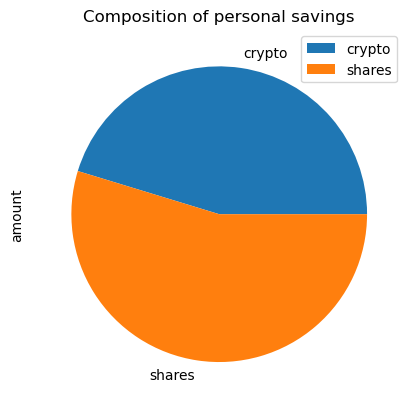

In [51]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of personal savings")

In [61]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
under_value = emergency_fund - total_savings
# Validate saving health
if total_savings > emergency_fund: 
    print(f"Congratulation! You have enough money in this fund")
elif total_savings == emergency_fund:
    print(f"Congratulation! You reached this financial goal")
else:
    print(f"You are ${under_value: 0.2f} dollars away from reaching the goal.")

Congratulation! You have enough money in this fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [67]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [73]:
# Get 5 years' worth of historical data for SPY and AGG
df_ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
SPY = df_ticker[df_ticker["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_ticker[df_ticker["symbol"]=="AGG"].drop("symbol", axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])


# Display sample data
df_ticker.head()

SPY                                     \
                             open    high     low   close     volume   
timestamp                                                              
2016-05-02 04:00:00+00:00  206.90  208.18  206.41  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.28  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.42  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.47  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.88  205.70   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2016-05-02 04:00:00+00:00  110.61  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.81  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.86  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.14  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.97  2718710       12697  111.031967

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_event = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [79]:
# Printing the simulation input data
MC_event.portfolio_data

SPY                                       \
                             open    high       low   close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.90  208.18  206.4100  208.03   61908515   
2016-05-03 04:00:00+00:00  206.50  206.80  205.2800  206.13  106422142   
2016-05-04 04:00:00+00:00  205.00  205.85  204.4200  204.96   92199810   
2016-05-05 04:00:00+00:00  205.57  205.98  204.4700  204.95   67597222   
2016-05-06 04:00:00+00:00  204.04  205.77  203.8800  205.70   89131004   
...                           ...     ...       ...     ...        ...   
2021-04-26 04:00:00+00:00  417.42  418.22  416.8111  417.61   51824860   
2021-04-27 04:00:00+00:00  417.97  418.14  416.3000  417.52   50297139   
2021-04-28 04:00:00+00:00  417.84  419.01  416.9000  417.40   50692781   
2021-04-29 04:00:00+00:00  420.38  420.72  416.4400  420.06   76965583   
2021-04-30 04:00:00+00:00  417.67  418.54  416.3400  417.30   84731942   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00      263580  207.294812          NaN  110.74   
2016-05-03 04:00:00+00:00      377518  206.312060    -0.009133  110.89   
2016-05-04 04:00:00+00:00      345261  205.090172    -0.005676  110.91   
2016-05-05 04:00:00+00:00      280622  205.141555    -0.000049  110.92   
2016-05-06 04:00:00+00:00      340335  204.937074     0.003659  111.12   
...                               ...         ...          ...     ...   
2021-04-26 04:00:00+00:00      295870  417.508245     0.002088  114.74   
2021-04-27 04:00:00+00:00      296300  417.481360    -0.000216  114.60   
2021-04-28 04:00:00+00:00      330049  417.742098    -0.000287  114.45   
2021-04-29 04:00:00+00:00      443396  418.824046     0.006373  114.14   
2021-04-30 04:00:00+00:00      478844  417.651995    -0.006570  114.41   

                                                                            \
                               high       low   close   volume trade_count   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.7400  110.5200  110.61  3553939       15119   
2016-05-03 04:00:00+00:00  110.9450  110.7500  110.81  3044940       15662   
2016-05-04 04:00:00+00:00  110.9315  110.7595  110.86  2920608       13982   
2016-05-05 04:00:00+00:00  111.1600  110.8010  111.14  3008142       15707   
2016-05-06 04:00:00+00:00  111.1200  110.9700  110.97  2718710       12697   
...                             ...       ...     ...      ...         ...   
2021-04-26 04:00:00+00:00  114.8015  114.6500  114.65  3480303       13520   
2021-04-27 04:00:00+00:00  115.1300  114.3700  114.37  3820640       12720   
2021-04-28 04:00:00+00:00  114.4685  114.2000  114.43  7075831       24303   
2021-04-29 04:00:00+00:00  114.3700  114.0900  114.37  6208142       21096   
2021-04-30 04:00:00+00:00  114.5150  114.3300  114.49  6469432       19582   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  110.627199          NaN  
2016-05-03 04:00:00+00:00  110.865995     0.001808  
2016-05-04 04:00:00+00:00  110.879063     0.000451  
2016-05-05 04:00:00+00:00  111.028363     0.002526  
2016-05-06 04:00:00+00:00  111.031967    -0.001530  
...                               ...          ...  
2021-04-26 04:00:00+00:00  114.706244    -0.000871  
2021-04-27 04:00:00+00:00  114.498315    -0.002442  
2021-04-28 04:00:00+00:00  114.379810     0.000525  
2021-04-29 04:00:00+00:00  114.250702    -0.000524  
2021-04-30 04:00:00+00:00  114.456246     0.001049  

[1259 rows x 16 columns]

In [80]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_event.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 110.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 120.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 130.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 140.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 150.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 160.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 170.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 180.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 190.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 200.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 210.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 220.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 230.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 240.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 250.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 260.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 270.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 280.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 290.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 300.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 310.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 320.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 330.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 340.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 350.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 360.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 370.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 380.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 390.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 400.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 410.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 420.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 430.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 440.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 450.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 460.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 470.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 480.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

Running Monte Carlo simulation number 490.


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-API

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004450,0.998442,1.001139,0.990762,1.005446,1.004362,0.998835,1.014336,0.999550,1.004548,...,0.999682,1.000188,0.990606,1.003405,1.005109,1.007495,1.002654,1.009752,0.998829,0.995062
2,1.003834,1.006157,0.995512,0.990883,1.007190,1.003934,0.997027,1.021811,0.999433,1.003982,...,1.000051,1.008537,0.987617,1.000833,1.003198,1.015419,0.999938,1.021483,0.998251,0.994606
3,1.006167,1.008946,1.000990,0.992799,1.016915,1.000825,0.996298,1.027178,1.006582,0.999045,...,0.999326,1.015646,0.978705,1.005104,0.999531,1.014875,1.001798,1.031505,0.993103,1.003949
4,1.018198,0.998600,1.012672,1.001712,1.012002,0.991838,0.999167,1.022340,1.009326,0.993248,...,0.993567,1.008909,0.979478,1.008236,1.006054,1.016664,1.007724,1.039889,0.988655,1.006673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.871071,20.014767,10.837618,24.507481,10.962864,9.804997,15.031426,31.655639,13.214573,5.363311,...,8.374858,22.217664,8.785921,16.464818,6.632007,3.693159,3.915700,22.077439,15.451753,10.136551
7557,11.886660,20.105296,10.807653,24.522966,10.979173,9.783156,14.962359,31.830264,13.259372,5.391474,...,8.387990,22.269355,8.813772,16.281520,6.597337,3.696697,3.943306,21.999528,15.521560,10.001539
7558,11.843511,19.996162,10.931992,24.376809,10.998819,9.823603,14.949580,31.970064,13.239853,5.425744,...,8.431164,22.174812,8.819837,16.277668,6.612890,3.736152,3.957592,22.043730,15.585391,9.961057
7559,11.709738,19.992256,11.063940,24.329869,11.063656,9.808327,15.095397,31.819639,13.417556,5.423406,...,8.562188,22.093488,8.822864,16.162746,6.647595,3.690803,3.940688,22.045304,15.704854,9.840032


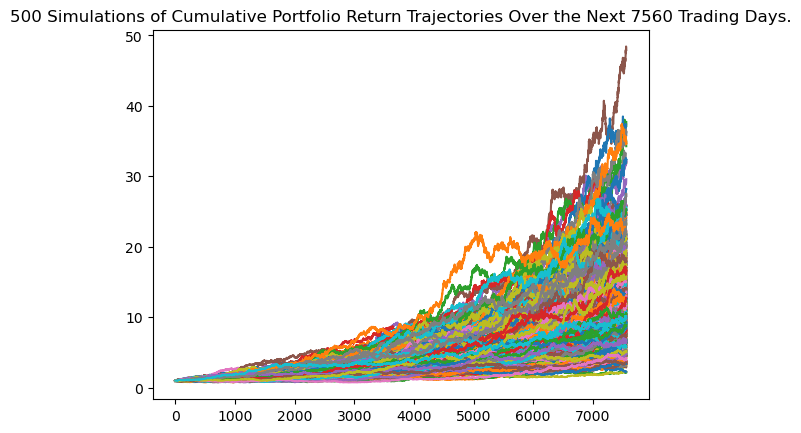

In [81]:
# Plot simulation outcomes
line_plot = MC_event.plot_simulation()

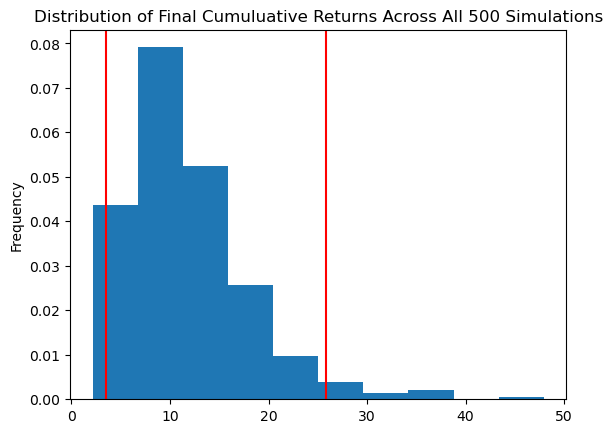

In [82]:
# Plot probability distribution and confidence intervals
dist_plot = MC_event.plot_distribution()

### Retirement Analysis

In [83]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat = MC_event.summarize_cumulative_return()

# Print summary statistics
print (sum_stat)

count           500.000000
mean             11.681003
std               6.202604
min               2.170392
25%               7.579102
50%              10.153692
75%              14.252790
max              47.923814
95% CI Lower      3.466772
95% CI Upper     25.822098
Name: 7560, dtype: float64


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [86]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_stat[8]*20000,2)
ci_upper = round(sum_stat[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $69335.45 and $516441.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [87]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stat[8]*(20000 * 1.5),2)
ci_upper = round(sum_stat[9]*(20000 * 1.5),2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $104003.17 and $774662.93


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [89]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_event2 = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = 100,
    num_trading_days = 252*5
)


In [90]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_event2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988305,0.995597,0.994948,0.994039,1.005025,1.008473,0.992152,1.002536,1.011135,1.003117,...,0.996694,0.996335,0.998861,1.004618,0.993292,1.002096,1.006403,0.995783,1.007681,0.995747
2,0.981643,0.995059,0.982913,0.995549,0.996635,1.005682,0.993756,1.001131,1.012629,0.990080,...,0.994532,1.006638,0.999295,1.005369,1.002965,1.005320,0.995348,1.004253,1.011545,0.998580
3,0.988025,0.995226,0.981722,0.993655,0.986905,1.004168,0.998089,0.994207,1.006541,0.982152,...,0.995157,1.014908,1.008743,1.015844,1.009950,1.004019,0.999289,1.000234,1.007816,1.013701
4,1.000225,0.988664,0.966746,0.994758,0.992432,0.991413,0.994291,0.980381,1.009838,0.982521,...,0.989289,1.003736,1.008297,1.017786,1.003157,1.017073,0.996189,1.002001,1.016297,1.019910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.329741,1.381929,1.401365,1.422215,1.630545,1.600444,1.211365,1.807126,2.054887,1.576456,...,1.493976,1.626042,1.307957,1.376429,1.361975,2.054908,1.554619,1.319935,2.098799,1.469901
1257,1.322225,1.367027,1.408600,1.428333,1.629819,1.600350,1.215874,1.810007,2.049016,1.580067,...,1.490918,1.636339,1.292592,1.379244,1.353028,2.063868,1.545912,1.312608,2.100115,1.464214
1258,1.315529,1.366029,1.401214,1.436854,1.622154,1.572516,1.216977,1.818211,2.061760,1.578259,...,1.489418,1.650915,1.299569,1.368769,1.349415,2.057400,1.532914,1.319096,2.102478,1.454232
1259,1.334998,1.354816,1.402792,1.440263,1.615001,1.582787,1.230217,1.829602,2.059305,1.579453,...,1.496731,1.657286,1.310725,1.377738,1.341935,2.060548,1.536422,1.323225,2.102126,1.463692


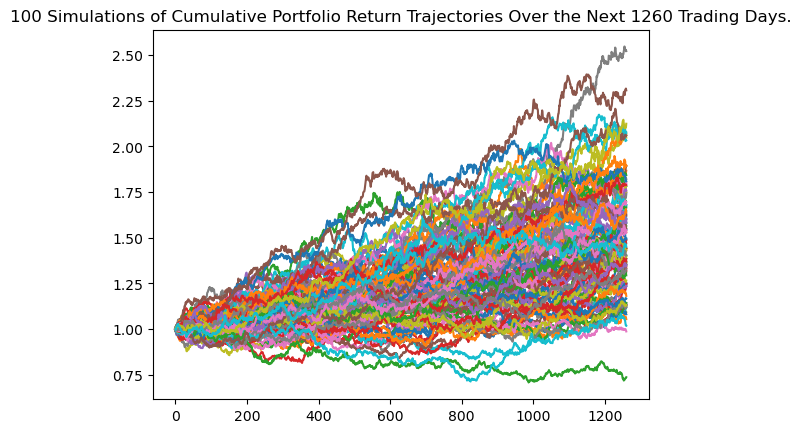

In [91]:
# Plot simulation outcomes
line_plot = MC_event2.plot_simulation()

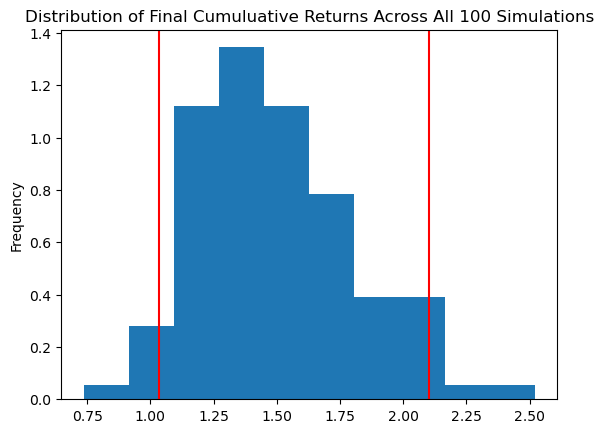

In [92]:
# Plot probability distribution and confidence intervals
dist_plot = MC_event2.plot_distribution()

In [94]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stat2 = MC_event2.summarize_cumulative_return()

# Print summary statistics
print(sum_stat2)

count           100.000000
mean              1.500844
std               0.315434
min               0.737170
25%               1.262159
50%               1.447546
75%               1.684077
max               2.521159
95% CI Lower      1.035929
95% CI Upper      2.101040
Name: 1260, dtype: float64


/Users/pux/Rutgers/RUT-VIRT-FIN-PT-09-2022-U-LOLC/02-Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [96]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stat2[8]*20000,2)
ci_upper_five = round(sum_stat2[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $20718.58 and $42020.79


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


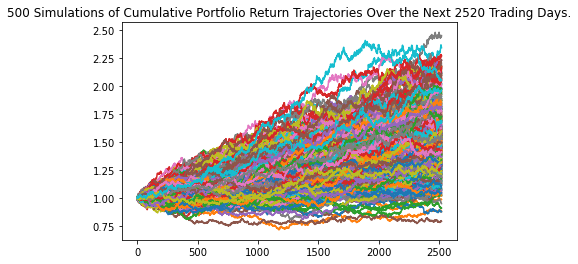

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

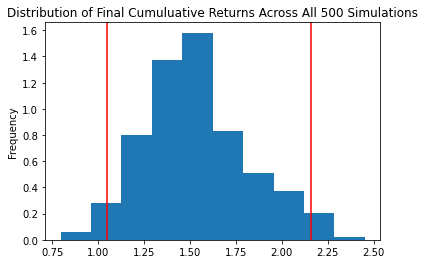

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
